In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

%matplotlib inline

In [2]:
n,p = 10, 0.5
s = np.random.binomial(n, p, 1)

In [3]:
s

array([6])

## 8.1大数の法則

正しいコインを10回投げる．表を成功として，i回目のコイン投げで表が出たら1，裏が出たら0を取る確率変数$x_{i}$を考える．10回のコイン投げで，表の出た回数(頻度)は，

$$
r = x_{1} + \cdot \cdot \cdot + x_{10}
$$

である．表が出た回数の割合$\hat{p}=r/10$は**観測された成功率**であって，$\hat{p} = 0.1, 0.2, \cdot \cdot \cdot$となる．一般に，nをコイン投げの回数とするとき，r/nは**相対頻度**である．rは確率変数で，n=10, p=0.5の二項分布Bi(10, 0.5)，すなわち，

$$
f_{10}(x) = {}_{10} C_{x} (1/2)^{10}, \ \ \ x=0,1,2,3,\cdot \cdot \cdot,10
$$

に，従い，その期待値，分散は，

$$
E(r) = np = 5, \ \ \ Var(r) = np(1-p) = 2.5
$$

だから，割合r/nの期待値，分散は，

$$
E(r/n) = p = 0.5, \ \ \ Var(r/n) = p(1-p)/n = 0.025 
$$

である．ここで，p=0.5の**真の成功率**と一致することが確認できる．成功の割合がx/10となる確率は$f_{10}(x)$なので，関数を定義して実際に確認してみると...

0.0 = 0.0009765625
0.1 = 0.009765625
0.2 = 0.0439453125
0.3 = 0.1171875
0.4 = 0.205078125
0.5 = 0.24609375
0.6 = 0.205078125
0.7 = 0.1171875
0.8 = 0.0439453125
0.9 = 0.009765625
1.0 = 0.0009765625


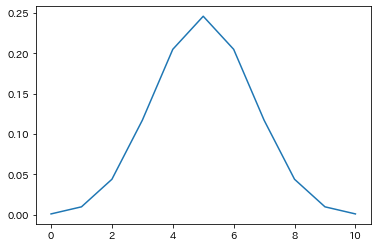

In [8]:
def bi(n,p,x):
    return comb(n,x) * p ** n

n = 10
p = 0.5
bi_lst = [bi(n,p,i) for i in range(11)]
for i in range(11):
    print(i/10, '=' ,bi_lst[i])
    
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(bi_lst)

plt.show()

期待値である真の成功率0.5及びその周辺の発生確率が高いが，表の割合が0.2以下，及び0.8以上である確率も11.0%近くあることがわかる．ここで，コイン投げの回数をn=10から増やしていって，r/nの期待値E(r/n)=p，及びその周辺が発生する確率がどの様になっていくかを調べてみる．

In [5]:
ns = [10,20,30,40,50,100,1000]
p = 0.5
for n in ns:
    bi_lst = [bi(n,p,i) for i in range(n+1)]
    l = int(len(bi_lst)*0.4)
    r = int(len(bi_lst)*0.6)+1
    prob = sum(bi_lst[l:r])
    print(f'P(0.4 <= r/{n} <= 0.6) = {prob}')

P(0.4 <= r/10 <= 0.6) = 0.65625
P(0.4 <= r/20 <= 0.6) = 0.7368240356445312
P(0.4 <= r/30 <= 0.6) = 0.7995115779340267
P(0.4 <= r/40 <= 0.6) = 0.8461400558371679
P(0.4 <= r/50 <= 0.6) = 0.8810795474405637
P(0.4 <= r/100 <= 0.6) = 0.9647997997822951
P(0.4 <= r/1000 <= 0.6) = 0.9999999998202966


となる．n=100の段階で，表の観測された成功率は0.4から0.6までの確率は96%を越えほとんどの値が真のp=0.5に集中する．    
一般に，$\varepsilon$がどの様に小さい(正の)値であっても，

$$
P(|r/n - p| \le \varepsilon) \rightarrow 1 \ \ \ (n \rightarrow \infty) 
$$

となることが保証されており，これが**大数の法則 (low og large numbers)**であり，**大標本では，観察された標本平均を母集団の真の平均(母平均)とみなしてよい**という常識を，数学的に厳密に証明できた．    

二項分布からもう少し一般化すると，$\varepsilon$を任意の正の定数，基の確率分布の平均を$\mu$，その分布からn個取られた観測値の平均を$\bar{X_{n}}$としたとき，

$$
P(|\bar{X_{n}} - \mu| \le \varepsilon) \rightarrow 1 \ \ \ (n \rightarrow \infty) 
$$

となると言い換えられる．直感的な理解としては，｢標本観測値の平均は，標本を大きくすると，真の平均(統計的には母平均)といくらでも近い値を取ることが極めて確かだ｣ということである．このように，大数の法則はもとの確率分布に関わらず成立するが，その証明には**チェビシェフの不等式**を用いる．    

一般に，確率変数$X_{1}, X_{2}, \cdot \cdot \cdot, X_{n}$は独立で，同一確率分布に従うとする．各$X_{i}$の期待値，分散は同一だから$E(X_{i}) = \mu$, $Var(X_{i})$とする．$\bar{X} = (X_{1} + X_{2} + \cdot \cdot \cdot + X_{n})/n$とすると，

$$
E(\bar{X}) = \mu, \ \ \ Var(\bar{X}) = \sigma^{2}/n
$$

これから，$\mu$にきわめて近い領域に$\bar{X}$が入る確率$P(|\bar{X} - \mu| \le \varepsilon)$がnが大きくなるとともに1に近づくことを示せば良い．それはこの領域に入らない確率が0収束することと同値である．$\bar{X}$を$\bar{X_{n}}$として，$\bar{X_{n}}$にチェブシェフの不等式

$$
P(|\bar{X} - \mu| \ge k\sigma_{n}) \le 1/k^{2}
$$

を適応する．ここで$\sigma^{2}_{n} = Var(\bar{X_{n}}) = \sigma^{2}/n$であることに注意する．$k\sigma_{n} = \varepsilon$とおくと，$k = \varepsilon / \sigma_{n} = \sqrt{n}\varepsilon/\sigma$であって，これから，

$$
P(|\bar{X} - \mu| > \varepsilon) \le \sigma^{2}/n\varepsilon \rightarrow 0 \ \ \ (n \rightarrow \infty)
$$

となって，示された．なお，確率論では$X_{n}$は$\mu$に**確率収束(converge in probability)**するという．



**【補足】チェビシェフの不等式&emsp;(Chebyshev's inequality)**    

テストの得点分布では，平均と分散しか分かっていない．そこで，次の問題を考える．    

<例>    
ある確率変数についてE(X) = 1, Var(X) = 1/3 であることしか分かっていない．これから$0 \le X \le 2$になる確率についてに何が言えるか．   

この問題は，確率分布が分かっていないのに，確率の値に見当をつけよ，というものである．現実には，よくあることである．平均と分散から，確率の見当をつけるときある程度役に立つのが，チェビシェフの不等式である．
　標準偏差は，確率変数の期待値からのばらつきを考えるときの尺度の単位として用いいられる．どのような確率変数Xもその期待値$\mu = E(X)$の周辺に確率が集中しており，期待値から離れるに従い少なくなるが，その程度は分散$\sigma^{2}=Var(X)$による．標準編$\sigma=D(X)$を単位に取るとき，一般に以下の不等式が成立する．これをチェビシェフの不等式という．   
　いかなる確率変数に対しても，

$$
P(|\bar{X} - \mu| > k\sigma_{n}) \le 1/k^{2}
$$

チェビシェフの不等式はいかなる確率変数に対しても成立するの意味で絶対的なものである．上の例では$\mu=1, \sigma=1/\sqrt{3}$であることから，

$$
P(0 \le X \le 2) = P(|X - \mu| \le \sqrt{3}\sigma) \ge 1 - (1/\sqrt{3})^2 \fallingdotseq 0.667
$$

となって，もとめる確率は2/3以上であることがわかる．

もちろん，f(x)の形が具体的にわかっていれば，確率の値そのものが求まる．しかし，確率分布が分かっていることは，しばしばそうでないから，そこにチェビシェフの不等式の意味がある．

## 8.2 中心極限定理

ごく大まかに言えば，母集団分布がなんであっても，**和$X_{1}+\cdot\cdot\cdot+X_{n}$の確率分布の形は，nが大きくなるときには，大略正規分布と考えて良い**ということである．